# MODÉLISATION

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from pprint import pprint

In [2]:
def Calcul_Erreur(Y_test,y_pred):
    print("MAE : {:.4f}".format( np.mean(abs(y_pred-Y_test)) ))
    print("R-squared : {:.4f}".format (r2_score(Y_test,y_pred)))
    print("MSE : {:.4f}".format( metrics.mean_squared_error(Y_test, y_pred) ))
    print("RMSE : {:.4f}".format(np.sqrt( metrics.mean_squared_error(Y_test, y_pred) )))
    
def Return_Erreur(Y_test,y_pred):
    MAE =(np.mean(abs(y_pred-Y_test)) )
    #R_squared = (r2_score(Y_test,y_pred))
    MSE = (metrics.mean_squared_error(Y_test, y_pred) )
    RMSE = (np.sqrt( metrics.mean_squared_error(Y_test, y_pred) ))
    return ( MAE, MSE, RMSE)
#,R_squared


In [120]:
df = pd.read_csv('df_clean.csv')

In [121]:
# df = pd.read_csv('df.csv')
# df.shape

In [122]:
df.dropna(axis=0, inplace=True)
df.shape

(3269, 63)

In [123]:
df.head(2)

,PrimaryPropertyType,Latitude,NumberofFloors,ComplianceStatus,BuildingType,CouncilDistrictCode,OSEBuildingID,Neighborhood,PropertyGFAParking,TotalGHGEmissions,...,Nonresidential COS,Nonresidential WA,SPS-District K-12,CSC 2,CSC 3,CSC 4,CSC 5,CSC 6,CSC 7,Age
0,Low-Rise Multifamily,47.609736,1.252192,1,Multifamily LR (1-4),CSC 7,61,Downtown,0.0,4.727919,...,0,0,0,0,0,0,0,0,1,116
1,Low-Rise Multifamily,47.544238,1.252192,1,Multifamily LR (1-4),CSC 1,266,Delridge,0.0,2.246015,...,0,0,0,0,0,0,0,0,0,9


In [124]:
df.columns

Index(['PrimaryPropertyType', 'Latitude', 'NumberofFloors', 'ComplianceStatus',
       'BuildingType', 'CouncilDistrictCode', 'OSEBuildingID', 'Neighborhood',
       'PropertyGFAParking', 'TotalGHGEmissions', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'NumberofBuildings',
       'Longitude', 'RecentUpgrade', 'Central', 'Delridge', 'Downtown', 'East',
       'Greater duwamish', 'Lake union', 'Magnolia / queen anne', 'North',
       'Northeast', 'Northwest', 'Southeast', 'Southwest',
       'High-Rise Multifamily', 'Hospital', 'Hotel', 'K-12 School',
       'Laboratory', 'Low-Rise Multifamily', 'Medical Office',
       'Mid-Rise Multifamily', 'Mixed Use Property', 'Office', 'Other',
       'Refrigerated Warehouse', 'Residence Hall', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
       'Supermarket / Grocery Store', 'University', 'Warehouse',
       'Worship Facility', 'Multifamily HR (10+)', 'Multifamily LR (1-4)',

In [125]:
data = df.drop(columns=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)

In [126]:
data.drop(columns=['BuildingType',
                   'OSEBuildingID',
                   'ComplianceStatus',
                   'Neighborhood',
                   'PrimaryPropertyType',
                   'CouncilDistrictCode'],
         axis=1,
         inplace=True)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 3270
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     3269 non-null   float64
 1   NumberofFloors               3269 non-null   float64
 2   PropertyGFAParking           3269 non-null   float64
 3   PropertyGFATotal             3269 non-null   float64
 4   PropertyGFABuilding(s)       3269 non-null   float64
 5   NumberofBuildings            3269 non-null   float64
 6   Longitude                    3269 non-null   float64
 7   RecentUpgrade                3269 non-null   int64  
 8   Central                      3269 non-null   int64  
 9   Delridge                     3269 non-null   int64  
 10  Downtown                     3269 non-null   int64  
 11  East                         3269 non-null   int64  
 12  Greater duwamish             3269 non-null   int64  
 13  Lake union        

In [128]:
X = data.values
y_e = df['SiteEnergyUse(kBtu)'].values
y_g = df['TotalGHGEmissions'].values

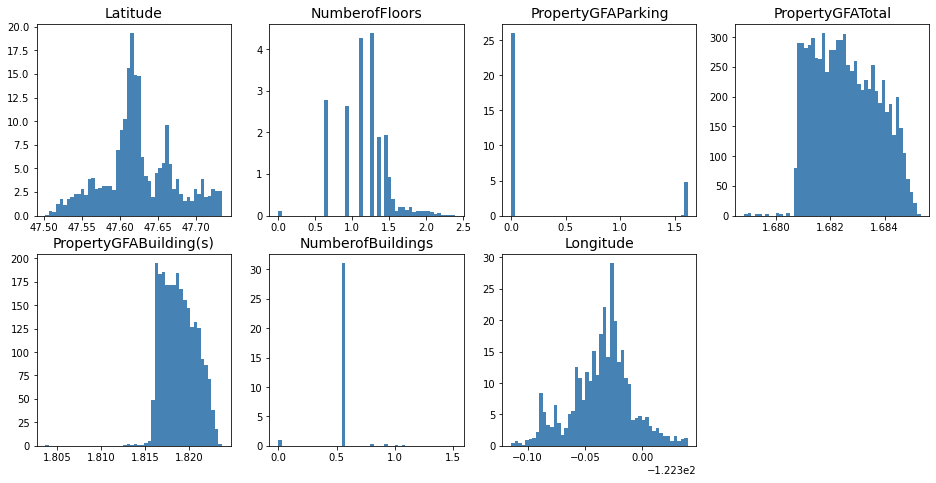

In [129]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(data.loc[:, :'Longitude'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [130]:
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

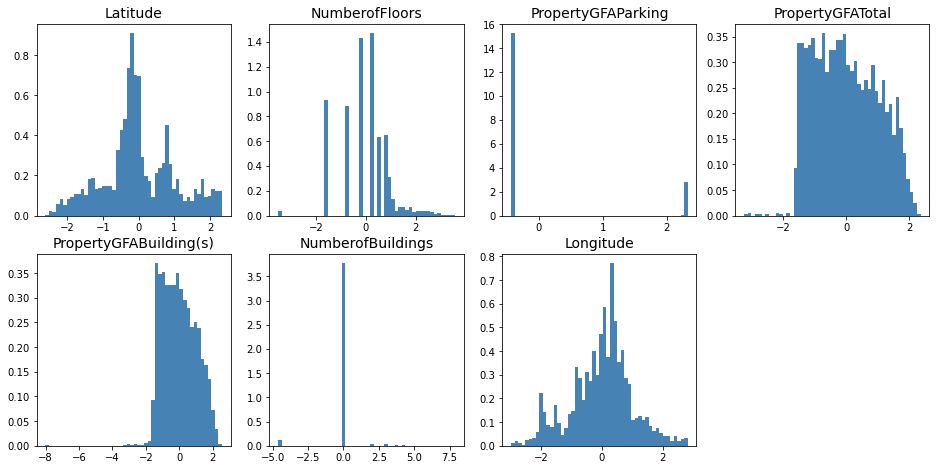

In [131]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(data.loc[:, :'Longitude'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [132]:
X_train, X_test, y_train_e, y_test_e = model_selection.train_test_split(X, y_e, test_size=0.3, random_state = 9 )

### REGRESSION LINÉAIRE

In [133]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_e)
y_pred_rli = lr.predict(X_test)

In [134]:
Abs = "log Site Energy Use (kBtu) "
Ord = "Prédiction de log Site Energy Use (kBtu)"

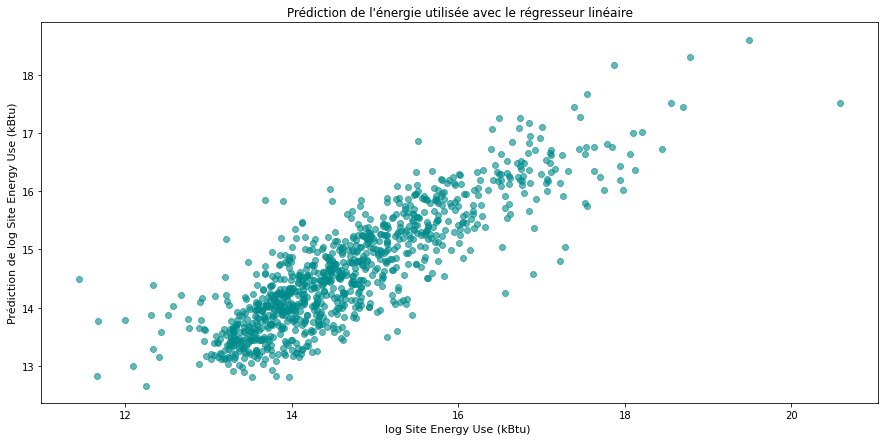

In [135]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 11)
ax.set_ylabel(Ord, fontsize = 11)
plt.title("Prédiction de l'énergie utilisée avec le régresseur linéaire", fontsize = 12)
plt.scatter(y_test_e, y_pred_rli, color='darkcyan', alpha=0.6)

In [136]:
Calcul_Erreur(y_test_e, y_pred_rli)

MAE : 0.4486
R-squared : 0.7359
MSE : 0.3685
RMSE : 0.6070


### REGRESSION RIDGE

In [141]:
# On récupère la MAE sur le jeu de données test comme baseline
baseline_error = np.mean(abs(y_pred_rli - y_test_e))
print(baseline_error)

0.44856003429007535


In [157]:
ridge2 = linear_model.Ridge()
n_alphas = 300
alphas = np.logspace(-7, 6, n_alphas)
coefs = []
errors = []
for a in alphas:
    ridge2.set_params(alpha=a)
    ridge2.fit(X_train, y_train_e)
    coefs.append(ridge2.coef_)
    errors.append([np.mean(abs(ridge2.predict(X_test) - y_test_e))])

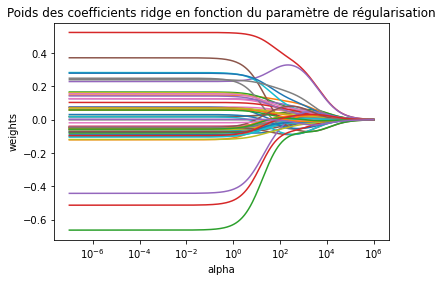

In [158]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Poids des coefficients ridge en fonction du paramètre de régularisation')
plt.axis('tight')
plt.show()

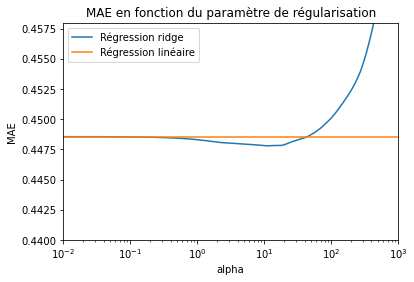

In [159]:
axes = plt.gca()
axes.plot(alphas, errors,[10**-8,10**5],[baseline_error,baseline_error])
axes.set_xscale('log')
plt.axis([0.01,1000,0.44,0.458])
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE en fonction du paramètre de régularisation')
plt.legend(['Régression ridge','Régression linéaire'])
plt.show()

In [160]:
min(errors)

[0.44779650322721115]

In [161]:
alphas[np.argmin(errors)]

11.052951411260198

In [162]:
clf_rr = linear_model.RidgeCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring='neg_mean_absolute_error',   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_rr.fit(X_train, y_train_e)


# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) et alpha sur le jeu d'entraînement:")
print(clf_rr.alpha_, clf_rr.coef_)
y_pred_rr = clf_rr.predict(X_test)

Meilleur(s) hyperparamètre(s) et alpha sur le jeu d'entraînement:
20.153376859417353 [-7.75946123e-02  5.74415914e-02  2.81382058e-02  4.77716163e-01
  2.71198066e-01  3.00542229e-02  6.90098998e-02 -3.84765158e-05
 -3.34283982e-02 -3.79242840e-02 -2.17531129e-02 -1.16078910e-02
 -4.64612094e-02 -1.98807485e-02 -3.33354200e-02 -6.01522166e-02
 -1.96868266e-02 -4.77453548e-02 -3.80004349e-02 -5.88782168e-02
  1.84251960e-02  1.34227204e-01  1.29798308e-01  4.78205162e-02
  1.13127974e-01  1.57719938e-01  9.96207036e-02  7.02930064e-02
  1.12283537e-01  2.01368109e-01  2.19400371e-01  4.83178242e-02
  3.69356920e-02  8.90553455e-02  1.05154281e-01 -6.59403462e-02
  1.15036912e-01  2.14406299e-01  5.53218809e-02 -3.06315611e-02
 -2.57356278e-03 -1.92427311e-02 -3.36389332e-01 -2.39955797e-01
 -2.06311258e-01  2.71712966e-02 -1.08874346e-02 -2.31922704e-02
 -8.44763265e-02 -5.26504082e-02 -4.38925150e-02 -3.51868661e-03
 -8.42221755e-03 -3.40127619e-02  1.82193591e-03]


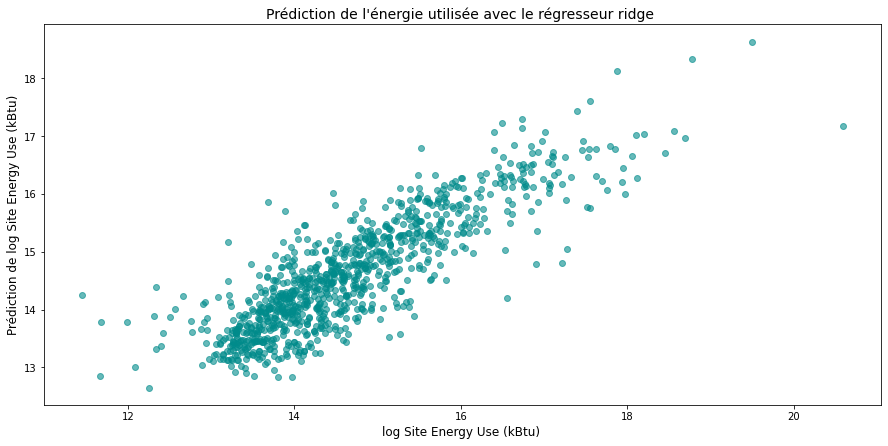

In [189]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur ridge ", fontsize = 14)
plt.scatter(y_test_e, y_pred_rr, color='darkcyan', alpha=0.6)

In [164]:
Calcul_Erreur(y_test_e,y_pred_rr)

MAE : 0.4479
R-squared : 0.7344
MSE : 0.3705
RMSE : 0.6087


### REGRESSION LASSO

In [165]:
clf_lasso = linear_model.LassoCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    #scoring='neg_mean_absolute_error',
    #store_cv_values = True
    )

# Optimiser ce classifieur sur le jeu d'entraînement
clf_lasso.fit(X_train, y_train_e)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) et coefficient sur le jeu d'entraînement:")
print(clf_lasso.alpha_,clf_lasso.coef_)
y_pred_lasso = clf_lasso.predict(X_test)

Meilleur(s) hyperparamètre(s) et coefficient sur le jeu d'entraînement:
1e-07 [-0.07644007  0.05727542  0.0192399   0.52486799  0.22954444  0.01857831
  0.07695222 -0.0007812  -0.05128191 -0.06904518 -0.05966333 -0.04350756
 -0.08033207 -0.03976973 -0.0597201  -0.07235431 -0.04044754 -0.05835623
 -0.05991221 -0.10052599  0.07606006  0.14877248  0.16690425  0.07238944
  0.12651697  0.37253594  0.12644949  0.24969766  0.1630324   0.28370019
  0.27998544  0.06138026  0.05858904  0.10401348  0.14319478 -0.04475825
  0.15688846  0.24053998  0.071037    0.0176095   0.03122638 -0.1206528
 -0.66368369 -0.5138214  -0.44269669 -0.04724322 -0.01844919 -0.04956758
 -0.11886491 -0.10407983 -0.09094715 -0.05587525 -0.05660127 -0.09556004
  0.00336064]


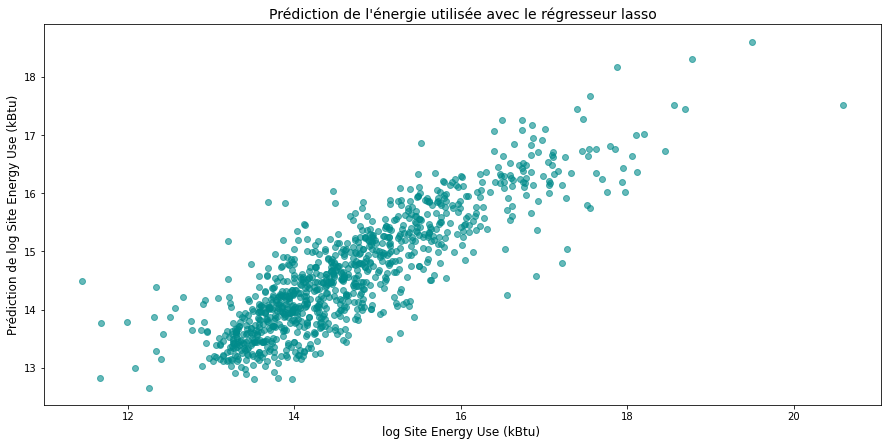

In [190]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur lasso", fontsize = 14)
plt.scatter(y_test_e, y_pred_lasso, color='darkcyan', alpha=0.6)

In [169]:
Calcul_Erreur(y_test_e,y_pred_lasso)

MAE : 0.4486
R-squared : 0.7359
MSE : 0.3685
RMSE : 0.6070


### REGRESSION ELASTIC NET

In [171]:
clf_el_net = linear_model.ElasticNetCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1]
    #store_cv_values = True
    )

# Optimiser ce classifieur sur le jeu d'entraînement
clf_el_net.fit(X_train, y_train_e)
y_pred_el_net = clf_el_net.predict(X_test)
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement alpha et :")
print(clf_el_net.alpha_,clf_el_net.l1_ratio_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement alpha et :
0.014924955450518291 0.1


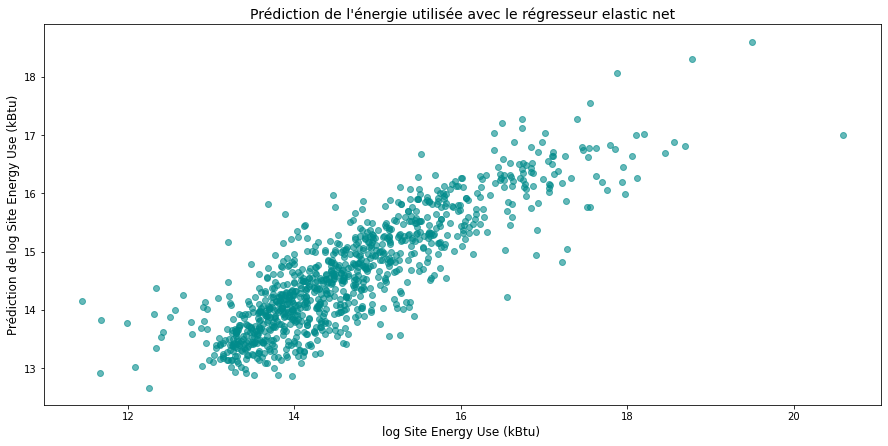

In [191]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur elastic net", fontsize = 14)
plt.scatter(y_test_e, y_pred_el_net, color='darkcyan', alpha=0.6)

In [173]:
Calcul_Erreur(y_test_e,y_pred_el_net)

MAE : 0.4486
R-squared : 0.7329
MSE : 0.3726
RMSE : 0.6104


### RANDOM FOREST

In [177]:
%%time
md = [i for i in range(4,40,3)]
mf = [j for j in range(7,30,2)]
parameters = {
    'max_depth': md,
    'max_features': mf,
             }

if __name__ == "__main__":

    clf_rfr = model_selection.GridSearchCV(RandomForestRegressor(),
                               parameters,
                               n_jobs=-1,
                               verbose=1,
                              scoring='neg_mean_absolute_error')

    print("Performing grid search...")
    print("parameters:")
    pprint(parameters)
    clf_rfr.fit(X_train, y_train_e)
    print()

    print("Best score: %0.3f" % -clf_rfr.best_score_)
    print("Best parameters set:")
    best_parameters = clf_rfr.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
parameters:
{'max_depth': [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37],
 'max_features': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   22.2s finished



Best score: 0.404
Best parameters set:
	max_depth: 31
	max_features: 13
Wall time: 22.7 s


In [180]:
%%time
y_pred_fa = clf_rfr.predict(X_test)

MAE = np.mean(abs(y_pred_fa-y_test_e))
print("MAE {:.4f}".format(MAE))

MAE 0.4139
Wall time: 18 ms


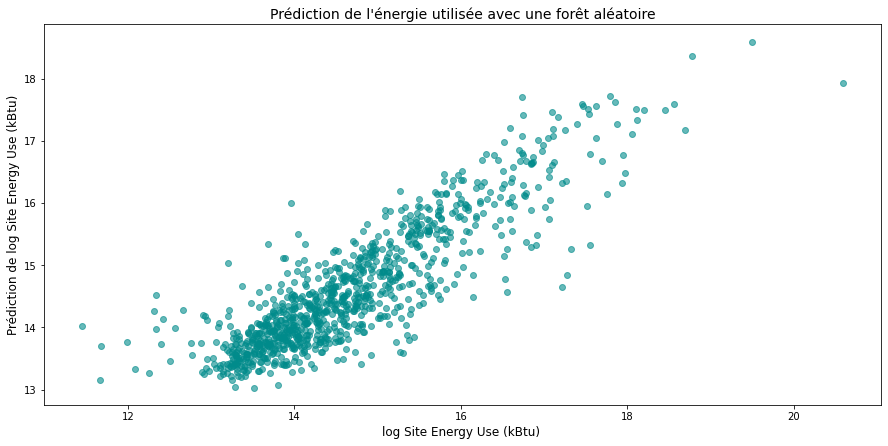

In [192]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec une forêt aléatoire", fontsize = 14)
plt.scatter(y_test_e, y_pred_fa, color='darkcyan', alpha=0.6)

In [182]:
Calcul_Erreur(y_test_e, y_pred_fa)

MAE : 0.4139
R-squared : 0.7598
MSE : 0.3352
RMSE : 0.5789


### XGBOOST

In [184]:
%%time
md2 = [i for i in range(2,9)]
mf2 = [j for j in range(7,30,2)]
parameters = {
    'max_depth': md2,
    'max_features': mf2
             }

if __name__ == "__main__":

    clf_xgb = model_selection.GridSearchCV(GradientBoostingRegressor(),
                               parameters,
                               n_jobs=10,
                               verbose=1,
                              scoring='neg_mean_absolute_error')

    print("Performing grid search...")
    print("parameters:")
    pprint(parameters)
    clf_xgb.fit(X_train, y_train_e)
    print()

    print("Best score: %0.3f" % -clf_xgb.best_score_)
    print("Best parameters set:")
    best_parameters = clf_xgb.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
parameters:
{'max_depth': [2, 3, 4, 5, 6, 7, 8],
 'max_features': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    6.2s



Best score: 0.392
Best parameters set:
	max_depth: 5
	max_features: 9
Wall time: 8.89 s


[Parallel(n_jobs=10)]: Done 420 out of 420 | elapsed:    8.7s finished


In [185]:
y_pred_xgb = clf_xgb.predict(X_test)
MAE_XGB = np.mean(abs(y_pred_xgb-y_test_e))
print("MAE {:.4f}".format(MAE_XGB))

MAE 0.4068


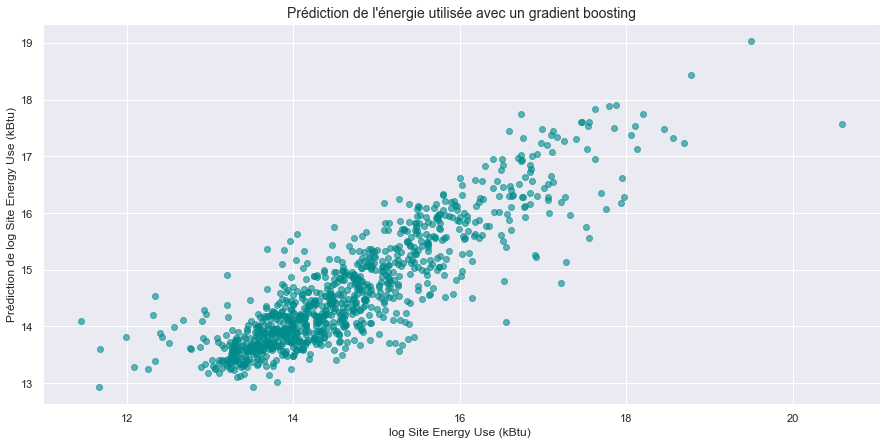

In [230]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec un gradient boosting", fontsize = 14)
plt.scatter(y_test_e, y_pred_xgb, color='darkcyan', alpha=0.6)

In [188]:
Calcul_Erreur(y_test_e,y_pred_xgb)

MAE : 0.4068
R-squared : 0.7700
MSE : 0.3209
RMSE : 0.5665


In [195]:
#Feature Importance
xgb = GradientBoostingRegressor(max_depth=5,max_features=9)
xgb.fit(X_train, y_train_e)
Val_feature_imp = xgb.feature_importances_
Feature = data.columns

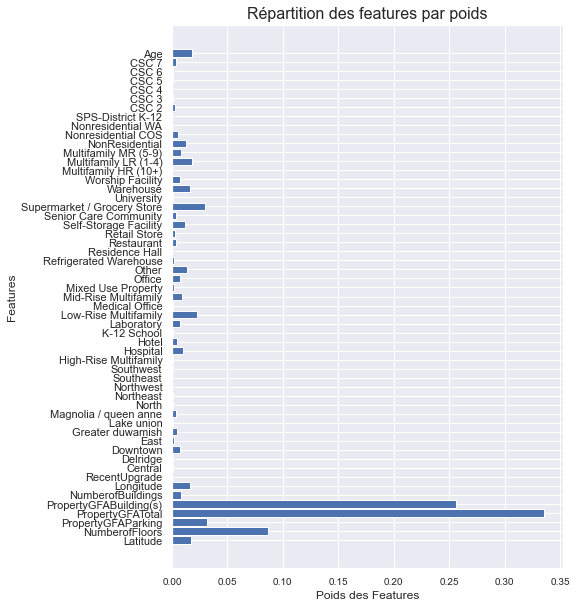

In [229]:
fig = plt.figure(figsize=(7,10))
axes = plt.axes()
axes.set_ylabel('Features', fontsize = 12)
axes.set_xlabel('Poids des Features', fontsize = 12)
#axes.set_ylim(0,1200)
plt.title('Répartition des features par poids', fontsize = 16)
plt.barh(Feature,Val_feature_imp)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11);

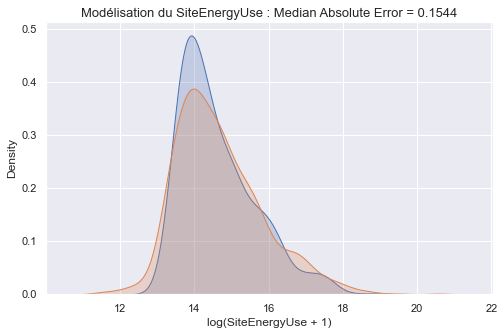

In [228]:
# Density plot
df_plot = pd.DataFrame({'Energy_pred':y_pred_xgb.tolist(), 'Energy_reading':y_test_e.tolist()})
fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(df_plot['Energy_pred'], shade=True, ax=ax)
sns.kdeplot(df_plot['Energy_reading'], shade=True, ax=ax)
ax.set_title('Modélisation du SiteEnergyUse : Median Absolute Error = 0.1544', fontsize=13)
ax.set_xlabel('log(SiteEnergyUse + 1)', fontsize=12)
plt.show()

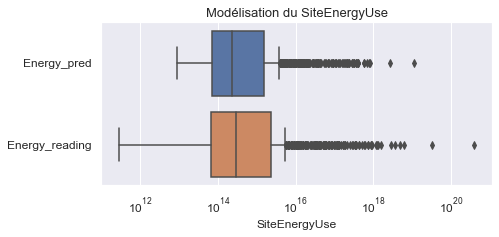

In [227]:
# Boxplot
fig, ax = plt.subplots(figsize=(7,3))
df_exp = pd.DataFrame({'Energy_pred':10**(y_pred_xgb)-1, 'Energy_reading':10**(y_test_e)-1})
Erreur = Return_Erreur(10**(y_pred_xgb)-1, 10**(y_test_e)-1)
bp = sns.boxplot(data=df_exp, orient='h')
ax.set_title('Modélisation du SiteEnergyUse', fontsize=13)
ax.set_xscale('log')
ax.tick_params(labelsize=12)
ax.set_xlabel('SiteEnergyUse', fontsize=12)
plt.show()

In [217]:
regLin_result = Return_Erreur(y_test_e,y_pred_rli)
regrid_result = Return_Erreur(y_test_e,y_pred_rr)
regLas_result = Return_Erreur(y_test_e,y_pred_lasso)
regElNt_result = Return_Erreur(y_test_e,y_pred_el_net)
RdmFo_result = Return_Erreur(y_test_e,y_pred_fa)
XGbst_result = Return_Erreur(y_test_e,y_pred_xgb)

In [225]:
sns.set()

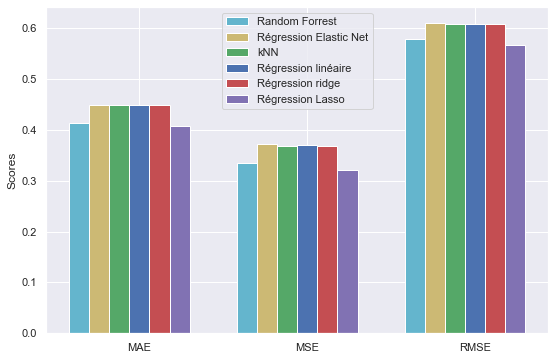

In [231]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.12       # the width of the bars

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot()

rects2 = ax.bar(ind, regLin_result, width, color='g')
rects3 = ax.bar(ind+width, regrid_result, width, color='b')
rects4 = ax.bar(ind+width*2, regLas_result, width, color='r')
rects5 = ax.bar(ind-width, regElNt_result, width, color='y')
rects6 = ax.bar(ind-width*2, RdmFo_result, width, color='c')
rects7 = ax.bar(ind+width*3, XGbst_result, width, color='m')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('MAE', 'MSE','RMSE') )
ax.legend( (rects6[0],rects5[0], rects2[0], rects3[0], rects4[0],rects7[0]), \
          ('Random Forrest','Régression Elastic Net','kNN', 'Régression linéaire', 'Régression ridge','Régression Lasso',\
           '(X)G Boost') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/6., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

plt.show()